# Making plots for MPhys 

## 2x2 grid of ship paths

In [2]:
import os 
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
#files = os.listdir("/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/emissions_tracked/2019")
#for file in files:
  #  print(file)
#data = pd.read_csv("/gws/nopw/j04/eo_shared_data_vol2/scratch/pete_nut/emissions_tracked/2019/01_01")
#data.sort_values('particle')

In [10]:
3118 * 365

1138070

In [ ]:
track = data[data['particle'] == 3]
track

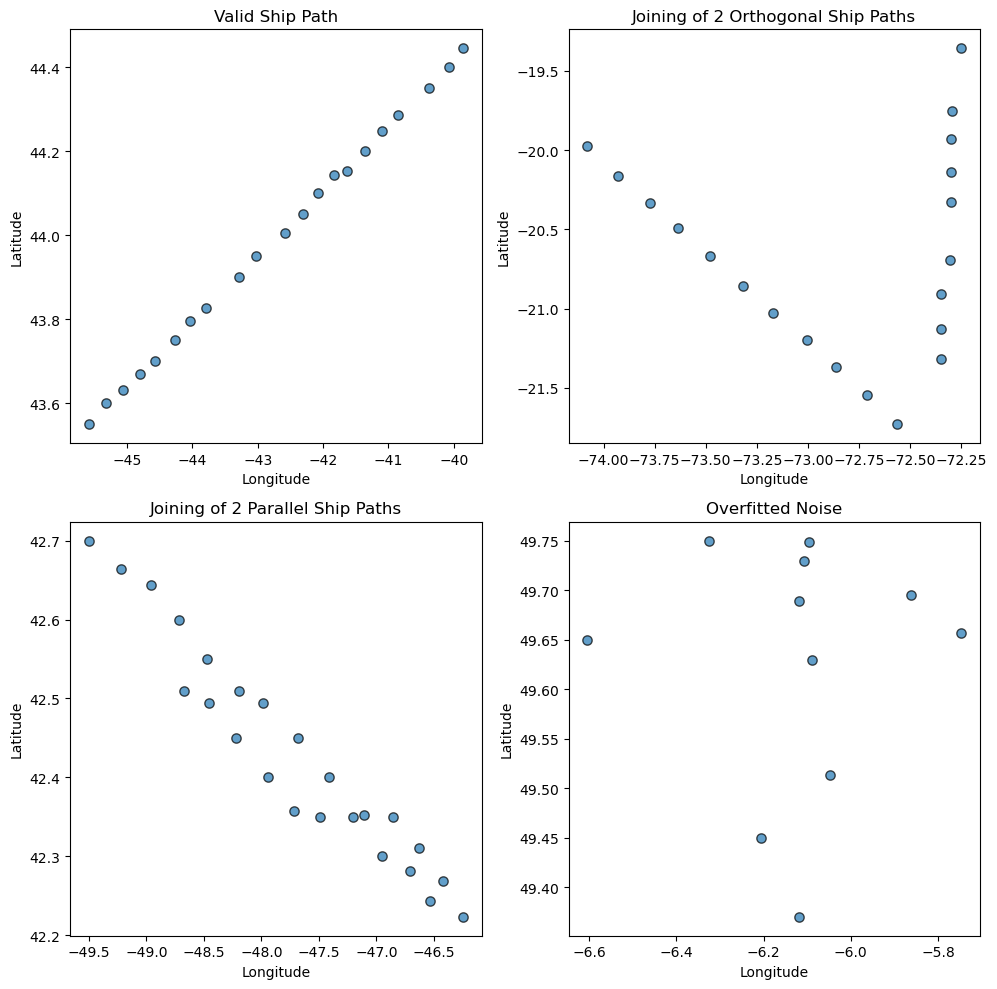

In [11]:
track1 = data[data['particle'] == 77]
track2 = data[data['particle'] == 2024]
track3 = data[data['particle'] == 98]
track4 = data[data['particle'] == 1]
Long1 = Lat1 = Long2 = Lat2 = Long3 = Lat3 =[]
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

Long1 = track1['longitude']
Lat1  = track1['latitude']

axs[0, 0].scatter(Long1, Lat1, edgecolor='black', label = 'x', s = 45, alpha=0.7)
axs[0, 0].set_title('Valid Ship Path')
axs[0, 0].set_xlabel('Longitude')
axs[0, 0].set_ylabel('Latitude')

Long2 = track2['longitude']
Lat2  = track2['latitude']
axs[0, 1].scatter(Long2, Lat2, edgecolor='black', label = 'x', s = 45, alpha=0.7)
axs[0, 1].set_title('Joining of 2 Orthogonal Ship Paths')
axs[0, 1].set_xlabel('Longitude')
axs[0, 1].set_ylabel('Latitude')

Long3 = track3['longitude']
Lat3  = track3['latitude']
axs[1, 0].scatter(Long3, Lat3, edgecolor='black', label = 'x', s = 45, alpha=0.7)
axs[1, 0].set_title('Joining of 2 Parallel Ship Paths')
axs[1, 0].set_xlabel('Longitude')
axs[1, 0].set_ylabel('Latitude')

Long4 = track4['longitude']
Lat4  = track4['latitude']
axs[1, 1].scatter(Long4, Lat4, edgecolor='black', label = 'x', s = 45, alpha=0.7)
axs[1, 1].set_title('Overfitted Noise')
axs[1, 1].set_xlabel('Longitude')
axs[1, 1].set_ylabel('Latitude')

plt.tight_layout()
plt.savefig("Outputs from ML Model.jpg", bbox_inches = 'tight', dpi = 400)
plt.show()

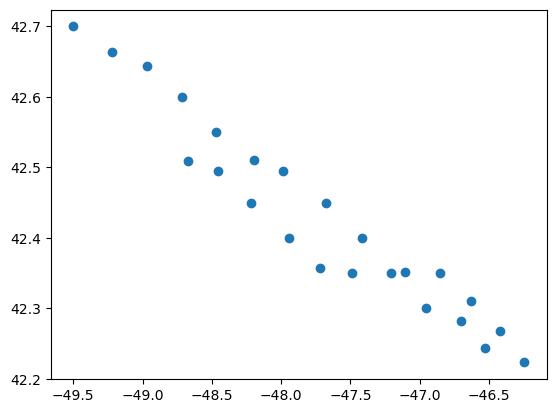

In [42]:
track1 = data[data['particle'] == 98]
Long = Lat = []
Long = track1['longitude']
Lat = track1['latitude']

plt.scatter(Long, Lat)
plt.show()

## Valid fitted ship tracks with CFs

In [2]:
files = os.listdir('/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/FittedData')
for file in files[:10]:
    print(file)
eg = pd.read_csv('/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/RealData/2019_01_01')
eg

2019_01_01
2019_01_02
2019_01_03
2019_01_04
2019_01_05
2019_01_06
2019_01_07
2019_01_08
2019_01_09
2019_01_10


,Unnamed: 0,hour,y,x,mass,signal,particle,latitude,longitude,R**2 value,PointLabel
0,0,2019-01-01 00:00:00,9.000000,1488.000000,6.989147,1.839249,3,49.550000,-15.600000,0.970418,Real LongLat
1,1,2019-01-01 01:00:00,9.923810,1483.409524,19.429477,2.405554,3,49.503810,-15.829524,0.970418,Real LongLat
2,2,2019-01-01 02:00:00,10.946429,1478.598214,19.529328,2.441166,3,49.452679,-16.070089,0.970418,Real LongLat
3,3,2019-01-01 03:00:00,12.227273,1471.522727,17.644531,2.606578,3,49.388636,-16.423864,0.970418,Real LongLat
4,4,2019-01-01 04:00:00,13.061728,1466.777778,16.950305,2.929682,3,49.346914,-16.661111,0.970418,Real LongLat
...,...,...,...,...,...,...,...,...,...,...,...
15647,15647,2019-01-01 19:00:00,1683.000000,31.096257,24.911316,2.664312,2799,-34.150000,-88.445187,0.982826,Real LongLat
15648,15648,2019-01-01 20:00:00,1682.058201,36.243386,27.031986,3.146580,2799,-34.102910,-88.187831,0.982826,Real LongLat
15649,15649,2019-01-01 21:00:00,1682.000000,41.919753,27.113488,3.347344,2799,-34.100000,-87.904012,0.982826,Real LongLat
15650,15650,2019-01-01 22:00:00,1681.138298,46.946809,22.371761,3.093967,2799,-34.056915,-87.652660,0.982826,Real LongLat


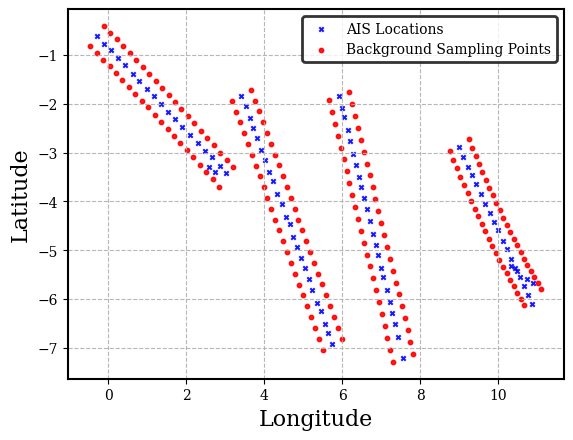

In [3]:
day = '05'
dfr = pd.read_csv(f'/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/RealData/2019_01_{day}')
dfu = pd.read_csv(f'/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/UpperCounterFacData/2019_01_{day}')
dfl = pd.read_csv(f'/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/LowerCounterFacData/2019_01_{day}')
ship_tracks =  [1564, 1472, 1493, 1499]#], 1532] 

dfr_relevant = dfr[(dfr['longitude'] < 16) & (dfr['longitude'] > -1) & (dfr['latitude'] < 0) & (dfr['latitude'] > -20) & (dfr['particle'].isin(ship_tracks))]
dfu_relevant = dfu[(dfu['longitude'] < 16) & (dfu['longitude'] > -1) & (dfu['latitude'] < 0) & (dfu['latitude'] > -20) & (dfu['particle'].isin(ship_tracks))] 
dfl_relevant = dfl[(dfl['longitude'] < 16) & (dfl['longitude'] > -1) & (dfl['latitude'] < 0) & (dfl['latitude'] > -20) & (dfl['particle'].isin(ship_tracks))]  

long_r = dfr_relevant['longitude']
lat_r  = dfr_relevant['latitude']
long_u = dfu_relevant['longitude']
lat_u  = dfu_relevant['latitude']
long_l = dfl_relevant['longitude']
lat_l  = dfl_relevant['latitude']

long_cf = list(long_u) + list(long_l)
lat_cf = list(lat_u) + list(lat_l)
#plt.hold_on()
plt.scatter(long_r, lat_r, marker='x', s=10, label='AIS Locations', alpha=0.9, color = 'blue')
plt.scatter(long_cf, lat_cf, marker='o', s=10, label='Background Sampling Points', alpha=0.9, color = 'red')
#plt.scatter(long_l, lat_l, marker='o', s=10, alpha=0.5)
plt.xlabel('Longitude', font = 'serif', fontsize = 16)
plt.ylabel('Latitude', font = 'serif', fontsize = 16)
plt.xticks(font = 'serif')
plt.yticks(font = 'serif')
#plt.title('Valid Ship Track With Sampling Points', fontsize=20)#, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.9)
legend = plt.legend(loc='upper right', frameon=True, prop={'family': 'serif'}, fontsize = 16)
legend.get_frame().set_linewidth(2) 
legend.get_frame().set_edgecolor('black')
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
#plt.axis('equal')
#plt.xlim([-13.5, -9])
#plt.savefig('ValidTrack.jpg', bbox_inches = 'tight', dpi = 400)
plt.show()


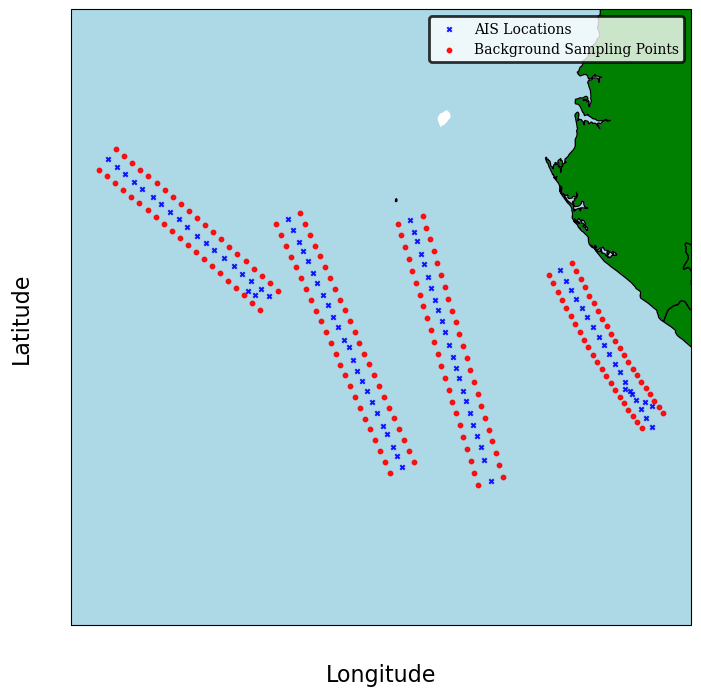

In [57]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plotting AIS Locations
plt.scatter(long_r, lat_r, transform=ccrs.PlateCarree(), marker='x', s=10, label='AIS Locations', alpha=0.9, color='blue')
# Plotting Background Sampling Points
plt.scatter(long_cf, lat_cf, transform=ccrs.PlateCarree(), marker='o', s=10, label='Background Sampling Points', alpha=0.9, color='red')

# Add land, coastlines, countries, and ocean
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='green')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.set_xticks([120., 140., 160., 180., -160., -140., -120.], crs=ccrs.PlateCarree())
ax.set_xticklabels([120., 140., 160., 180., -160., -140., -120.], color='red', weight='bold')
ax.set_yticks([20, 40], crs=ccrs.PlateCarree())
ax.set_yticklabels([20, 40])
ax.yaxis.tick_right()

lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Add country labels
ax.add_feature(cfeature.BORDERS)
#ax.set_extent([-150, 60, -25, 60])
#ax.text(0, -15, 'Countries', fontsize=10, ha='center', va='center', transform=ccrs.PlateCarree())

# Manually add x and y labels
ax.text(0.5, -0.08, 'Longitude', fontsize=16, ha='center', va='center', transform=ax.transAxes)
ax.text(-0.08, 0.5, 'Latitude', fontsize=16, ha='center', va='center', transform=ax.transAxes, rotation='vertical')

plt.xticks(font='serif')
plt.yticks(font='serif')
plt.grid(True, linestyle='--', alpha=0.9)
legend = plt.legend(loc='upper right', frameon=True, prop={'family': 'serif'}, fontsize=16)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('black')
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.axis('equal')

plt.show()


AttributeError: 'tuple' object has no attribute 'get_label'

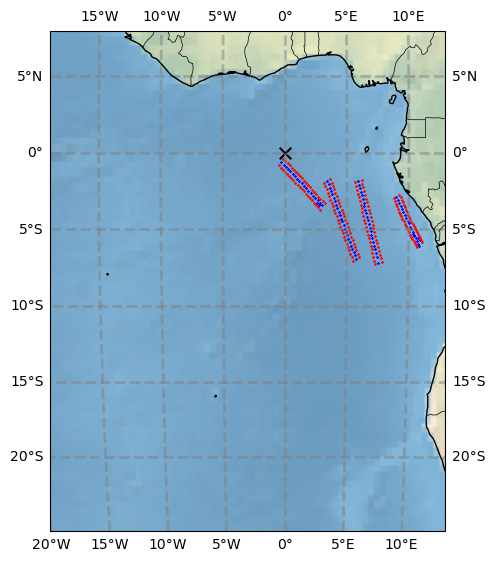

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.legend_handler import HandlerTuple

fig = plt.figure(figsize=(8, 6.5))

# Define projection and axes
projMoll = ccrs.Mollweide(central_longitude=0)
ax = fig.add_subplot(1, 1, 1, projection=projMoll)

# Add features
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.stock_img()

# Define region
lonW = -19
lonE = 13
latS = -25
latN = 8
res = '50m'

# Plot points
seviri_lon = 0
seviri_lat = 0

scatter1 = plt.scatter(seviri_lon, seviri_lat, transform=ccrs.PlateCarree(), marker='x', s=70, label='SEVIRI Sub Surface Point', alpha=1,
            color='black')
scatter2 = plt.scatter(long_r, lat_r, transform=ccrs.PlateCarree(), marker='x', s=1, label='AIS Locations', alpha=0.9,
            color='blue')
scatter3 = plt.scatter(long_cf, lat_cf, transform=ccrs.PlateCarree(), marker='o', s=1, label='Background Sampling Points',
            alpha=0.9, color='red')

# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--', x_inline=False, zorder=1)

ax.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree())

# Generate points for longitude lines
num_points = 100  # Number of points for each longitude line

# Define the latitude and longitude ranges for the box
lat_box = np.linspace(-22, 0, num_points)
lon_box = np.linspace(-16, 10, num_points)

# Plot the lines enclosing the box

# Add coastlines
ax.coastlines(resolution=res, color='black')

# Add legend
handler_map = {type(scatter1): HandlerTuple(ndivide=None)}
legend = plt.legend(handles=[(scatter1, scatter2, scatter3)], loc='upper left', frameon=True, prop={'family': 'serif'}, fontsize=26, handler_map=handler_map)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('black')

ax.plot(np.full(num_points, -16), lat_box, transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder=2)
ax.plot(np.full(num_points, 10), lat_box, transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder=2)
ax.plot(lon_box, np.full(num_points, -22), transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder=2)
ax.plot(lon_box, np.full(num_points, 0), transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder=2)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'black', 'font': 'serif'}
gl.ylabel_style = {'color': 'black', 'size': 12, 'font': 'serif'}

# Inset map
# Define the inset map projection
inset_proj = ccrs.PlateCarree()

# Create a new subplot for the inset map
inset_ax = fig.add_axes([0.325, 0.155, 0.3, 0.3], projection=inset_proj) #left, right, height, width

# Add features to the inset map
inset_ax.coastlines(resolution=res, color='black', linewidth=0.5)
inset_ax.add_feature(cfeature.BORDERS.with_scale(res), linewidth=0.5)

# Set the extent of the inset map
inset_ax.set_extent([-2, 12, -8, 1], crs=inset_proj)

# Plot points on the inset map
inset_ax.plot(seviri_lon, seviri_lat, transform=ccrs.PlateCarree(), marker='x', markersize=7, color='black')

# Draw a bounding box around the inset region
ax.add_patch(plt.Rectangle((-2, -8), 14, 9, linewidth=1, alpha = 0.6, edgecolor='black', facecolor='none', transform=ccrs.PlateCarree()))

# Draw lines connecting the inset to specific points on the main plot

inset_ax.scatter(long_r, lat_r, transform=ccrs.PlateCarree(), marker='x', s=1, label='AIS Locations', alpha=0.9,
            color='blue')
inset_ax.scatter(long_cf, lat_cf, transform=ccrs.PlateCarree(), marker='o', s=1, label='Background Sampling Points',
            alpha=0.9, color='red')
top_left = [-15.2, -11.45]
bottom_right = [4.42, -21.69]
#ax.scatter(top_left[0], top_left[1], transform=ccrs.PlateCarree(), marker='x', s=70, alpha=1, color='black')
#ax.scatter(bottom_right[0], bottom_right[1], transform=ccrs.PlateCarree(), marker='x', s=70, alpha=1, color='black')
ax.plot([top_left[0],-2], [top_left[1],1], color='black', linestyle='-', linewidth=0.6, transform=ccrs.PlateCarree())
ax.plot([bottom_right[0],12], [bottom_right[1],-8], color='black', linestyle='-', linewidth=0.6, transform=ccrs.PlateCarree())

#inset_ax.indicate_inset_zoom(inset_ax)
inset_ax.stock_img()
plt.savefig('globe_with_inset', bbox_inches='tight', dpi=400)

plt.show()


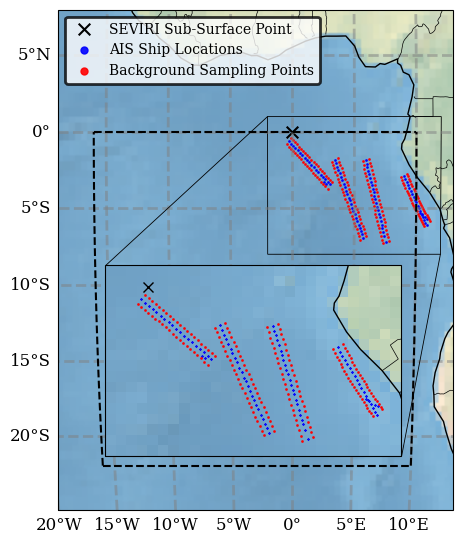

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(8, 6.5))

# Define projection and axes
projMoll = ccrs.Mollweide(central_longitude=0)
ax = fig.add_subplot(1, 1, 1, projection=projMoll)

# Add features
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='black')
ax.stock_img()

# Define region
lonW = -19
lonE = 13
latS = -25
latN = 8
res = '110m'

# Plot points
seviri_lon = 0
seviri_lat = 0

plt.scatter(seviri_lon, seviri_lat, transform=ccrs.PlateCarree(), marker='x', s=70, label='SEVIRI Sub-Surface Point', alpha=1,
            color='black')
plt.scatter(long_r, lat_r, transform=ccrs.PlateCarree(), marker='o', s=1, label='AIS Ship Locations', alpha=0.9,
            color='blue')
plt.scatter(long_cf, lat_cf, transform=ccrs.PlateCarree(), marker='o', s=1, label='Background Sampling Points',
            alpha=0.9, color='red')

# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--', x_inline=False, zorder=1)

ax.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree())

# Generate points for longitude lines
num_points = 100  # Number of points for each longitude line

# Define the latitude and longitude ranges for the box
lat_box = np.linspace(-22, 0, num_points)
lon_box = np.linspace(-16, 10, num_points)

# Plot the lines enclosing the box

# Add coastlines
ax.coastlines(resolution=res, color='black')

# Add legend
legend = plt.legend(loc='upper left', frameon=True, prop={'family': 'serif'}, fontsize=26)
legend.legendHandles[2]._sizes = [25]
legend.legendHandles[1]._sizes = [25]
#legend = plt.legend(loc='upper left', frameon=True, prop={'family': 'serif'}, fontsize=26, markerscale = 5)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('black')

ax.plot(np.full(num_points, -16), lat_box, transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder=2)
ax.plot(np.full(num_points, 10), lat_box, transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder=2)
ax.plot(lon_box, np.full(num_points, -22), transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder=2)
ax.plot(lon_box, np.full(num_points, 0), transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder=2)

gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'black', 'font': 'serif'}
gl.ylabel_style = {'color': 'black', 'size': 12, 'font': 'serif'}

# Inset map
# Define the inset map projection
inset_proj = ccrs.PlateCarree()

# Create a new subplot for the inset map
inset_ax = fig.add_axes([0.325, 0.155, 0.37, 0.37], projection=inset_proj) #left, right, height, width

# Add features to the inset map
inset_ax.coastlines(resolution=res, color='black')#, linewidth=0.5)
inset_ax.add_feature(cfeature.BORDERS.with_scale(res), linewidth=0.5)

# Set the extent of the inset map
inset_ax.set_extent([-2, 12, -8, 1], crs=inset_proj)

# Plot points on the inset map
inset_ax.plot(seviri_lon, seviri_lat, transform=ccrs.PlateCarree(), marker='x', markersize=7, color='black')

# Draw a bounding box around the inset region
ax.add_patch(plt.Rectangle((-2, -8), 14, 9, linewidth=0.6, edgecolor='black', facecolor='none', transform=ccrs.PlateCarree()))

# Draw lines connecting the inset to specific points on the main plot

inset_ax.scatter(long_r, lat_r, transform=ccrs.PlateCarree(), marker='x', s=1, label='AIS Locations', alpha=0.9,
            color='blue')
inset_ax.scatter(long_cf, lat_cf, transform=ccrs.PlateCarree(), marker='o', s=1, label='Background Sampling Points',
            alpha=0.9, color='red')
top_left = [-15.1, -8.7]
bottom_right = [9.2, -21.35]
#ax.scatter(top_left[0], top_left[1], transform=ccrs.PlateCarree(), marker='x', s=70, alpha=1, color='black')
#ax.scatter(bottom_right[0], bottom_right[1], transform=ccrs.PlateCarree(), marker='x', s=70, alpha=1, color='black')
ax.plot([top_left[0],-2], [top_left[1],1], color='black', linestyle='-', linewidth=0.6, transform=ccrs.PlateCarree())
ax.plot([bottom_right[0],12], [bottom_right[1],-8], color='black', linestyle='-', linewidth=0.6, transform=ccrs.PlateCarree())
inset_ax.spines['top'].set_linewidth(1)
inset_ax.spines['right'].set_linewidth(1)
inset_ax.spines['bottom'].set_linewidth(1)
inset_ax.spines['left'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
#inset_ax.indicate_inset_zoom(inset_ax)
inset_ax.stock_img()
plt.savefig('globe_with_inset', bbox_inches='tight', dpi=400)

plt.show()


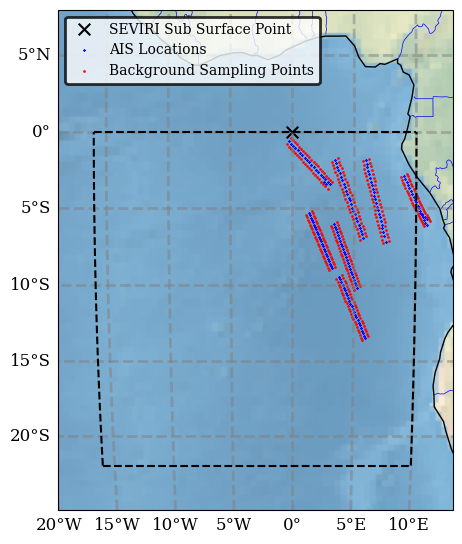

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy

fig = plt.figure(figsize=(8, 6.5))

# Define projection and axes
projMoll = ccrs.Mollweide(central_longitude=0)
ax = fig.add_subplot(1, 1, 1, projection=projMoll)

# Set title
#ax.set_title("Mollweide Projection", font='serif')

# Add features
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor='blue')
ax.stock_img()

# Define region
lonW = -19
lonE = 13
latS = -25
latN = 8
res = '110m'

# Plot points
seviri_lon = 0
seviri_lat = 0

plt.scatter(seviri_lon, seviri_lat, transform=ccrs.PlateCarree(), marker='x', s=70, label='SEVIRI Sub Surface Point', alpha=1,
            color='black')
plt.scatter(long_r, lat_r, transform=ccrs.PlateCarree(), marker='x', s=1, label='AIS Locations', alpha=0.9,
            color='blue')
plt.scatter(long_cf, lat_cf, transform=ccrs.PlateCarree(), marker='o', s=1, label='Background Sampling Points',
            alpha=0.9, color='red')

# Set gridlines
gl = ax.gridlines(draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--', x_inline=False, zorder = 1)

ax.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree())

# Generate points for longitude lines
num_points = 100  # Number of points for each longitude line

# Define the latitude and longitude ranges for the box
lat_box = np.linspace(-22, 0, num_points)
lon_box = np.linspace(-16, 10, num_points)

# Plot the lines enclosing the box

# Add coastlines
ax.coastlines(resolution=res, color='black')
legend = plt.legend(loc='upper left', frameon=True, prop={'family': 'serif'}, fontsize=26)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor('black')
ax.plot(np.full(num_points, -16), lat_box, transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder = 2)
ax.plot(np.full(num_points, 10), lat_box, transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder = 2)
ax.plot(lon_box, np.full(num_points, -22), transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder = 2)
ax.plot(lon_box, np.full(num_points, 0), transform=ccrs.PlateCarree(), color='black', linestyle='--', zorder = 2)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'black', 'font': 'serif'}
gl.ylabel_style = {'color': 'black', 'size': 12, 'font': 'serif'}
plt.savefig('globe', bbox_inches = 'tight', dpi = 400)
plt.show()


In [17]:
valid_tracks = set()
for number in range(len(dfr_relevant)):
    valid_tracks.add(dfr_relevant['particle'].iloc[number])
valid_tracks


 1472,
 1493,
 1499,


 1532,

 1547,
 1564,
 1636,




{1441,
 1467,
 1472,
 1493,
 1499,
 1503,
 1516,
 1532,
 1539,
 1547,
 1564,
 1636,
 2244,
 2665,
 2889}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['text.usetex'] = False

day = '17'
dfr = pd.read_csv(f'/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/RealData/2019_01_{day}')
dfu = pd.read_csv(f'/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/UpperCounterFacData/2019_01_{day}')
dfl = pd.read_csv(f'/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12/LowerCounterFacData/2019_01_{day}')
ship_track = 1484

dfr_relevant = dfr[(dfr['longitude'] < 10) & (dfr['longitude'] > -16) & (dfr['latitude'] < 0) & (dfr['latitude'] > -22) & (dfr['particle'] == ship_track)]
dfu_relevant = dfu[(dfu['longitude'] < 10) & (dfu['longitude'] > -16) & (dfu['latitude'] < 0) & (dfu['latitude'] > -22) & (dfu['particle'] == ship_track)]
dfl_relevant = dfl[(dfl['longitude'] < 10) & (dfl['longitude'] > -16) & (dfl['latitude'] < 0) & (dfl['latitude'] > -22) & (dfl['particle'] == ship_track)]

long_r = dfr_relevant['longitude']
lat_r  = dfr_relevant['latitude']
long_u = dfu_relevant['longitude']
lat_u  = dfu_relevant['latitude']
long_l = dfl_relevant['longitude']
lat_l  = dfl_relevant['latitude']

# Use Seaborn color palette
#colors = sns.color_palette("Set2", 3)

# Plot with improved aesthetics
plt.scatter(long_r, lat_r, marker='x', s=15, color='blue', label='AIS Locations', alpha=1)
plt.scatter(long_u, lat_u, marker='o', s=15, color='black', label='Background Sampling Points', alpha=1)
plt.scatter(long_l, lat_l, marker='o', s=15, color='black', alpha=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.title('Valid Ship Track With Sampling Points', fontsize=12)#, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.8)
plt.legend(loc='upper left', frameon=True)
plt.axis('equal')
#plt.xlim([-13.5, -9])
plt.savefig('ValidTrack.jpg', bbox_inches = 'tight', dpi = 400)
plt.show()


# Investigating values of Albedo

In [3]:
data_path = pathlib.Path("/gws/nopw/j04/eo_shared_data_vol2/scratch/AO12")
# Use a nested list comprehension to generate the file paths for each month
Real_files = sorted(list((data_path/"RealDataAdvected").glob("2019_01*")))
CFU_files = sorted(list((data_path/"UpperCounterFacDataAdvected").glob("2019_01*")))
CFL_files = sorted(list((data_path/"LowerCounterFacDataAdvected").glob("2019_01*")))
# Flatten the nested lists and concatenate the files
cf_df = pd.concat((pd.read_csv(f) for f in CFU_files + CFL_files), ignore_index=True)
real_df = pd.concat((pd.read_csv(f) for f in Real_files), ignore_index=True)

In [4]:
import numpy as np 
cf_df = pd.concat((pd.read_csv(f) for f in CFU_files + CFL_files), ignore_index=True)
real_df = pd.concat((pd.read_csv(f) for f in Real_files), ignore_index=True)
wh_valid_real = np.logical_and.reduce([real_df["cer_uncertainty"] < 10, real_df["cer"] > 0, real_df["cer"] < 40,  real_df["illum"] == 1,
                                       real_df["cot_uncertainty"] < 10, real_df["cot"] > 0, real_df["cot"] < 100, real_df["cwp_uncertainty"] < 10,
                                       real_df["cwp"] > 0, real_df["cwp"] < 100, real_df["cloud_type"] == 3,  real_df["Visible_Albedo"] != np.nan, 
                                       real_df["Albedo_Uncertainty"] != np.nan, real_df['cth'] > 0.5, real_df['cth'] < 2.5,  real_df['cth_uncertainty'] < 2, 
                                       real_df["timestep"] < 8])
wh_valid_cf = np.logical_and.reduce([cf_df["cer_uncertainty"] < 10, cf_df["cer"] > 0, cf_df["cer"] < 40,  cf_df["illum"] == 1,
                                       cf_df["cot_uncertainty"] < 10, cf_df["cot"] > 0, cf_df["cot"] < 100, cf_df["cwp_uncertainty"] < 10,
                                       cf_df["cwp"] > 0, cf_df["cwp"] < 100, cf_df["cloud_type"] == 3,  cf_df["Visible_Albedo"] != np.nan, 
                                       cf_df["Albedo_Uncertainty"] != np.nan, cf_df['cth'] > 0.5, cf_df['cth'] < 2.5, cf_df['cth_uncertainty'] < 2, 
                                       cf_df["timestep"] < 8])

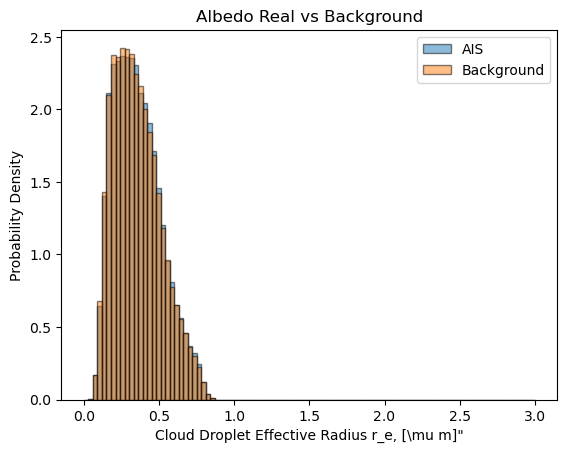

In [9]:
vis_alb_real = real_df["Visible_Albedo"][wh_valid_real]
vis_alb_cf   = cf_df["Visible_Albedo"][wh_valid_cf]
#fig, axs_real = plt.subplots(1, 1, figsize=(15, 5))

# Plot 'cer' on the existing subplot
plt.hist(vis_alb_real, bins=np.linspace(0, 1, 101), density=True, edgecolor='black', alpha=0.5, label='AIS')
plt.hist(vis_alb_cf, bins=np.linspace(0, 1, 101), density=True, edgecolor='black', alpha=0.5, label='Background')
plt.title('Albedo Real vs Background')
plt.xlabel('Cloud Droplet Effective Radius r_e, [\mu m]"')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

